In [1]:
from utils import get_df, data_lines, filter_GoT_df
import pandas as pd
import tomotopy as tp
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import topic_clustering as tc
import pre_processing as pp
import random


%load_ext autoreload
%autoreload 2
%matplotlib inline

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ivana/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /Users/ivana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ivana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ivana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/ivana/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
df = get_df()

### Preprocessing

In [3]:
tokenizer = pp.TokTokTokenizer()

stopwords = pp.stopwords()

translator = pp.translator()

#nltk.download('wordnet')
lemmatizer = pp.lemmatizer()

stemmer = pp.stemmer()

In [4]:
type(df["Sentence"])
df["Tokenized"] = df["Sentence"].map(lambda x: tokenizer.tokenize(x))
df["Cleaned"] = df["Tokenized"].map(lambda x: pp.clean_tokens(x,translator,stopwords))
#df["Stemmed"] = df["Cleaned"].map(lambda x: pp.stem(x, stemmer))
df["Lemmatized"] = df["Cleaned"].map(lambda x: pp.lemmatize(x, lemmatizer))
df["PoS Tagged"] = df["Lemmatized"].map(lambda x: pp.pos_tag(x))
df["Nouns only"] = df["PoS Tagged"].map(lambda x: pp.get_only_nouns(x))
df["Nouns and Verbs"] = df["PoS Tagged"].map(lambda x: pp.get_nouns_and_verbs(x))

In [5]:
df

,Release Date,Season,Episode,Episode Title,Name,Sentence,Tokenized,Cleaned,Lemmatized,PoS Tagged,Nouns only,Nouns and Verbs
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,"[What, do, you, expect, ?, They, ', re, savage...","[expect, one, goat, lot, ripping, pieces, stea...","[expect, one, goat, lot, ripping, piece, steal...","[(expect, VB), (one, CD), (goat, NN), (lot, NN...","[goat, lot, piece, steal, savage]","[expect, goat, lot, piece, steal, savage]"
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,"[I, ', ve, never, seen, wildlings, do, a, thin...","[wildlings, ever, never, seen, thing, like, life]","[wildlings, ever, never, seen, thing, like, life]","[(wildlings, NNS), (ever, RB), (never, RB), (s...","[thing, life]","[thing, life]"
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,"[How, close, did, you, get, ?]","[close, get]","[close, get]","[(close, RB), (get, VB)]",[],[get]
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,"[Close, as, any, man, would, .]","[would, close, man]","[would, close, man]","[(would, MD), (close, VB), (man, NN)]",[man],"[close, man]"
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,"[We, should, head, back, to, the, wall, .]","[back, head, wall]","[back, head, wall]","[(back, RB), (head, NN), (wall, NN)]","[head, wall]","[head, wall]"
...,...,...,...,...,...,...,...,...,...,...,...,...
23906,2019-05-19,Season 8,Episode 6,The Iron Throne,brienne,I think we can all agree that ships take prece...,"[I, think, we, can, all, agree, that, ships, t...","[ships, precedence, take, brothels, agree, think]","[ship, precedence, take, brothel, agree, think]","[(ship, JJ), (precedence, NN), (take, VB), (br...","[precedence, brothel, think]","[precedence, take, brothel, think]"
23907,2019-05-19,Season 8,Episode 6,The Iron Throne,bronn,I think that's a very presumptuous statement.,"[I, think, that, ', s, a, very, presumptuous, ...","[statement, presumptuous, think]","[statement, presumptuous, think]","[(statement, NN), (presumptuous, JJ), (think, ...","[statement, think]","[statement, think]"
23908,2019-05-19,Season 8,Episode 6,The Iron Throne,tyrion lannister,I once brought a jackass and a honeycomb into ...,"[I, once, brought, a, jackass, and, a, honeyco...","[jackass, honeycomb, brothel, brought]","[jackass, honeycomb, brothel, brought]","[(jackass, NN), (honeycomb, NN), (brothel, NN)...","[jackass, honeycomb, brothel]","[jackass, honeycomb, brothel]"
23909,2019-05-19,Season 8,Episode 6,The Iron Throne,man,The Queen in the North!,"[The, Queen, in, the, North, !]","[north, queen]","[north, queen]","[(north, RB), (queen, JJ)]",[],[]


### Linkage computing

In [7]:
tfidf_matrx = tc.get_tfidf_matrix(df["Lemmatized"])

In [8]:
dist = tc.cosine_dist(tfidf_matrx)

In [9]:
linkage = tc.get_linkage(dist, method='ward')

In [48]:
np.save("linkage", linkage)

### Cluster exploration

#### Depth 3, t=1

In [11]:
clusters = tc.get_clusters_from_linkage(linkage, depth=3)

In [13]:
df["cluster"] = pd.Series(clusters)

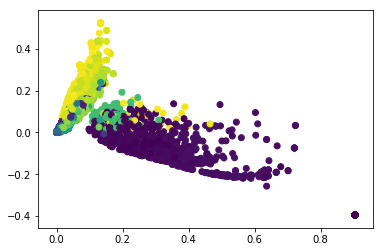

In [14]:
tc.plot_clusters(tfidf_matrx, df["cluster"])

In [18]:
tc.analyze(df, "cluster", n=3)

,lines count,top character,top series,most significant character
cluster,,,,
1,127,"jon snow ,sansa stark ,tyrion lannister","Season 3 ,Season 6 ,Season 4","varys ,petyr ,ros"
2,3,"eddard stark ,loras tyrell ,catelyn stark",Season 1,"loras ,unsullied captain ,all three"
3,2,theon greyjoy,Season 2,"unsullied captain ,all three ,renly"
4,3,"brienne ,tyrion lannister ,catelyn stark","Season 5 ,Season 6 ,Season 1","brienne ,all three ,renly"
5,3,"sparrow ,tywin lannister ,renly","Season 5 ,Season 4 ,Season 2","renly ,sparrow ,gerard"
...,...,...,...,...
9822,1,qyburn,Season 8,"qyburn ,end ,brienne"
9823,1,margaery tyrell,Season 3,"unsullied captain ,all three ,renly"
9824,1,brienne,Season 2,"brienne ,all three ,renly"


#### Depth 10, t=1

In [19]:
clusters = tc.get_clusters_from_linkage(linkage, depth=10)

In [20]:
df["cluster"] = pd.Series(clusters)

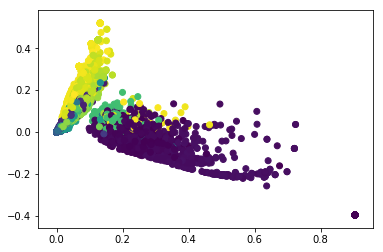

In [21]:
tc.plot_clusters(tfidf_matrx, df["cluster"])

In [22]:
tc.analyze(df, "cluster", n=3)

,lines count,top character,top series,most significant character
cluster,,,,
1,127,"jon snow ,sansa stark ,tyrion lannister","Season 3 ,Season 6 ,Season 4","varys ,petyr ,ros"
2,3,"eddard stark ,loras tyrell ,catelyn stark",Season 1,"loras ,unsullied captain ,all three"
3,2,theon greyjoy,Season 2,"unsullied captain ,all three ,renly"
4,3,"brienne ,tyrion lannister ,catelyn stark","Season 5 ,Season 6 ,Season 1","brienne ,all three ,renly"
5,3,"sparrow ,tywin lannister ,renly","Season 5 ,Season 4 ,Season 2","renly ,sparrow ,gerard"
...,...,...,...,...
9805,1,qyburn,Season 8,"qyburn ,end ,brienne"
9806,1,margaery tyrell,Season 3,"unsullied captain ,all three ,renly"
9807,1,brienne,Season 2,"brienne ,all three ,renly"


#### Depth 100, t=1

In [24]:
clusters = tc.get_clusters_from_linkage(linkage, depth=100)

In [25]:
df["cluster"] = pd.Series(clusters)

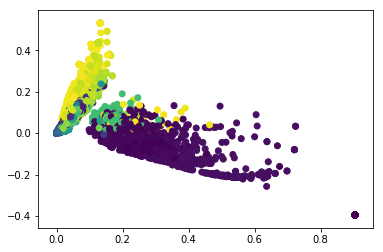

In [26]:
tc.plot_clusters(tfidf_matrx, df["cluster"])

In [27]:
tc.analyze(df, "cluster", n=3)

Number of clusters: 9809


,lines count,top character,top series,most significant character
cluster,,,,
1,127,"jon snow ,sansa stark ,tyrion lannister","Season 3 ,Season 6 ,Season 4","varys ,petyr ,ros"
2,3,"eddard stark ,loras tyrell ,catelyn stark",Season 1,"loras ,unsullied captain ,all three"
3,2,theon greyjoy,Season 2,"unsullied captain ,all three ,renly"
4,3,"brienne ,tyrion lannister ,catelyn stark","Season 5 ,Season 6 ,Season 1","brienne ,all three ,renly"
5,3,"sparrow ,tywin lannister ,renly","Season 5 ,Season 4 ,Season 2","renly ,sparrow ,gerard"
...,...,...,...,...
9805,1,qyburn,Season 8,"qyburn ,end ,brienne"
9806,1,margaery tyrell,Season 3,"unsullied captain ,all three ,renly"
9807,1,brienne,Season 2,"brienne ,all three ,renly"


#### Depth 1000, t=1

In [28]:
clusters = tc.get_clusters_from_linkage(linkage, depth=1000)

In [29]:
df["cluster"] = pd.Series(clusters)

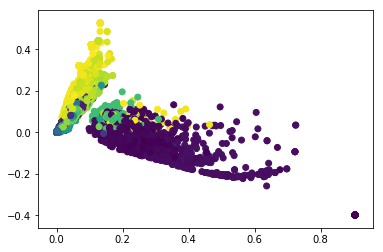

In [30]:
tc.plot_clusters(tfidf_matrx, df["cluster"])

In [31]:
tc.analyze(df, "cluster", n=3)

Number of clusters: 9809


,lines count,top character,top series,most significant character
cluster,,,,
1,127,"jon snow ,sansa stark ,tyrion lannister","Season 3 ,Season 6 ,Season 4","varys ,petyr ,ros"
2,3,"eddard stark ,loras tyrell ,catelyn stark",Season 1,"loras ,unsullied captain ,all three"
3,2,theon greyjoy,Season 2,"unsullied captain ,all three ,renly"
4,3,"brienne ,tyrion lannister ,catelyn stark","Season 5 ,Season 6 ,Season 1","brienne ,all three ,renly"
5,3,"sparrow ,tywin lannister ,renly","Season 5 ,Season 4 ,Season 2","renly ,sparrow ,gerard"
...,...,...,...,...
9805,1,qyburn,Season 8,"qyburn ,end ,brienne"
9806,1,margaery tyrell,Season 3,"unsullied captain ,all three ,renly"
9807,1,brienne,Season 2,"brienne ,all three ,renly"


#### Depth 10000, t=1

In [32]:
clusters = tc.get_clusters_from_linkage(linkage, depth=10000)

In [33]:
df["cluster"] = pd.Series(clusters)

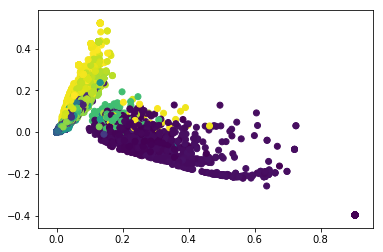

In [34]:
tc.plot_clusters(tfidf_matrx, df["cluster"])

In [35]:
tc.analyze(df, "cluster", n=3)

Number of clusters: 9809


,lines count,top character,top series,most significant character
cluster,,,,
1,127,"jon snow ,sansa stark ,tyrion lannister","Season 3 ,Season 6 ,Season 4","varys ,petyr ,ros"
2,3,"eddard stark ,loras tyrell ,catelyn stark",Season 1,"loras ,unsullied captain ,all three"
3,2,theon greyjoy,Season 2,"unsullied captain ,all three ,renly"
4,3,"brienne ,tyrion lannister ,catelyn stark","Season 5 ,Season 6 ,Season 1","brienne ,all three ,renly"
5,3,"sparrow ,tywin lannister ,renly","Season 5 ,Season 4 ,Season 2","renly ,sparrow ,gerard"
...,...,...,...,...
9805,1,qyburn,Season 8,"qyburn ,end ,brienne"
9806,1,margaery tyrell,Season 3,"unsullied captain ,all three ,renly"
9807,1,brienne,Season 2,"brienne ,all three ,renly"


#### Depth 1 000 000, t=1

In [41]:
clusters = tc.get_clusters_from_linkage(linkage, depth=1000000)

depth


In [42]:
df["cluster"] = pd.Series(clusters)

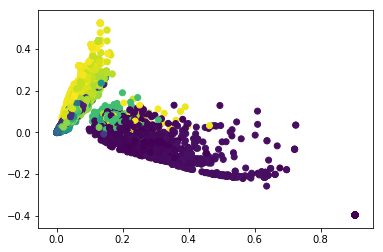

In [45]:
tc.plot_clusters(tfidf_matrx, df["cluster"])

In [44]:
tc.analyze(df, "cluster", n=3)

Number of clusters: 9809


,lines count,top character,top series,most significant character
cluster,,,,
1,127,"jon snow ,sansa stark ,tyrion lannister","Season 3 ,Season 6 ,Season 4","varys ,petyr ,ros"
2,3,"eddard stark ,loras tyrell ,catelyn stark",Season 1,"loras ,unsullied captain ,all three"
3,2,theon greyjoy,Season 2,"unsullied captain ,all three ,renly"
4,3,"brienne ,tyrion lannister ,catelyn stark","Season 5 ,Season 6 ,Season 1","brienne ,all three ,renly"
5,3,"sparrow ,tywin lannister ,renly","Season 5 ,Season 4 ,Season 2","renly ,sparrow ,gerard"
...,...,...,...,...
9805,1,qyburn,Season 8,"qyburn ,end ,brienne"
9806,1,margaery tyrell,Season 3,"unsullied captain ,all three ,renly"
9807,1,brienne,Season 2,"brienne ,all three ,renly"


In [46]:
df

,Release Date,Season,Episode,Episode Title,Name,Sentence,Tokenized,Cleaned,Lemmatized,PoS Tagged,Nouns only,Nouns and Verbs,cluster,cluster1
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,"[What, do, you, expect, ?, They, ', re, savage...","[expect, one, goat, lot, ripping, pieces, stea...","[expect, one, goat, lot, ripping, piece, steal...","[(expect, VB), (one, CD), (goat, NN), (lot, NN...","[goat, lot, piece, steal, savage]","[expect, goat, lot, piece, steal, savage]",56,56
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,"[I, ', ve, never, seen, wildlings, do, a, thin...","[wildlings, ever, never, seen, thing, like, life]","[wildlings, ever, never, seen, thing, like, life]","[(wildlings, NNS), (ever, RB), (never, RB), (s...","[thing, life]","[thing, life]",7434,7434
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,"[How, close, did, you, get, ?]","[close, get]","[close, get]","[(close, RB), (get, VB)]",[],[get],550,550
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,"[Close, as, any, man, would, .]","[would, close, man]","[would, close, man]","[(would, MD), (close, VB), (man, NN)]",[man],"[close, man]",6984,6984
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,"[We, should, head, back, to, the, wall, .]","[back, head, wall]","[back, head, wall]","[(back, RB), (head, NN), (wall, NN)]","[head, wall]","[head, wall]",6130,6130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23906,2019-05-19,Season 8,Episode 6,The Iron Throne,brienne,I think we can all agree that ships take prece...,"[I, think, we, can, all, agree, that, ships, t...","[ships, precedence, take, brothels, agree, think]","[ship, precedence, take, brothel, agree, think]","[(ship, JJ), (precedence, NN), (take, VB), (br...","[precedence, brothel, think]","[precedence, take, brothel, think]",8149,8149
23907,2019-05-19,Season 8,Episode 6,The Iron Throne,bronn,I think that's a very presumptuous statement.,"[I, think, that, ', s, a, very, presumptuous, ...","[statement, presumptuous, think]","[statement, presumptuous, think]","[(statement, NN), (presumptuous, JJ), (think, ...","[statement, think]","[statement, think]",8136,8136
23908,2019-05-19,Season 8,Episode 6,The Iron Throne,tyrion lannister,I once brought a jackass and a honeycomb into ...,"[I, once, brought, a, jackass, and, a, honeyco...","[jackass, honeycomb, brothel, brought]","[jackass, honeycomb, brothel, brought]","[(jackass, NN), (honeycomb, NN), (brothel, NN)...","[jackass, honeycomb, brothel]","[jackass, honeycomb, brothel]",3506,3506
23909,2019-05-19,Season 8,Episode 6,The Iron Throne,man,The Queen in the North!,"[The, Queen, in, the, North, !]","[north, queen]","[north, queen]","[(north, RB), (queen, JJ)]",[],[],1305,1305


#### Depth 10, t=3

In [49]:
clusters = tc.get_clusters_from_linkage(linkage, depth=10, t=3)

In [50]:
df["cluster"] = pd.Series(clusters)

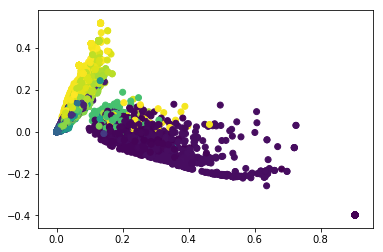

In [51]:
tc.plot_clusters(tfidf_matrx, df["cluster"])

In [54]:
tc.analyze(df, "cluster", n=3)

Number of clusters: 731


,lines count,top character,top series,most significant character
cluster,,,,
233,3649,"tyrion lannister ,jon snow ,daenerys targaryen","Season 3 ,Season 2 ,Season 4","man ,brienne ,sam"
25,186,"jon snow ,tyrion lannister ,cersei lannister","Season 6 ,Season 3 ,Season 4","davos ,lothar ,karl"
585,175,"tyrion lannister ,daenerys targaryen ,jaime la...","Season 3 ,Season 2 ,Season 4","matthos ,bronn ,guard"
11,173,"tyrion lannister ,cersei lannister ,daenerys t...","Season 2 ,Season 3 ,Season 5","tormund ,petyr ,missandei"
725,138,"davos ,barristan ,missandei","Season 2 ,Season 5 ,Season 4","barristan ,missandei ,qyburn"
...,...,...,...,...
540,2,"olenna tyrell ,catelyn stark","Season 7 ,Season 1","unsullied captain ,all three ,renly"
471,2,"bran stark ,jaime lannister","Season 8 ,Season 1","unsullied captain ,all three ,renly"
97,2,"arya stark ,daario","Season 5 ,Season 8","daario ,gerard ,colen"


#### Depth 1000, t=3

In [55]:
clusters = tc.get_clusters_from_linkage(linkage, depth=1000, t=3)

In [56]:
df["cluster"] = pd.Series(clusters)

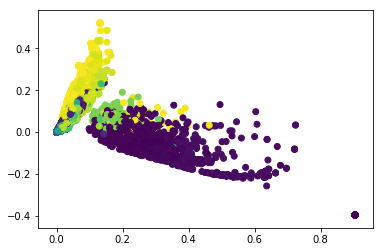

In [57]:
tc.plot_clusters(tfidf_matrx, df["cluster"])

In [58]:
tc.analyze(df, "cluster", n=3)

Number of clusters: 1537


,lines count,top character,top series,most significant character
cluster,,,,
536,1158,"jon snow ,tyrion lannister ,sansa stark","Season 3 ,Season 2 ,Season 4","sam ,brienne ,gilly"
329,1025,"tyrion lannister ,jaime lannister ,daenerys ta...","Season 3 ,Season 4 ,Season 2","brienne ,varys ,davos"
1,127,"jon snow ,sansa stark ,tyrion lannister","Season 3 ,Season 6 ,Season 4","varys ,petyr ,ros"
1366,121,"tyrion lannister ,cersei lannister ,daenerys t...","Season 3 ,Season 1 ,Season 7","sandor ,tormund ,bronn"
1527,120,"barristan ,davos ,missandei","Season 5 ,Season 2 ,Season 4","barristan ,missandei ,qyburn"
...,...,...,...,...
777,1,maester luwin,Season 1,"luwin ,maester ,saan"
779,1,petyr baelish,Season 3,"petyr ,unsullied captain ,saan"
780,1,rickon stark,Season 1,"rickon ,saan ,brienne"


#### Depth 1 000 000, t=3 

In [59]:
clusters = tc.get_clusters_from_linkage(linkage, depth=1000000, t=3)

In [60]:
df["cluster"] = pd.Series(clusters)

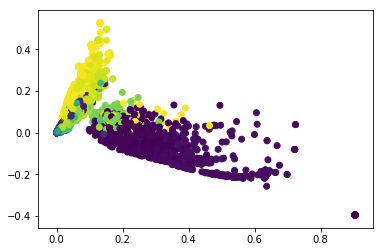

In [61]:
tc.plot_clusters(tfidf_matrx, df["cluster"])

In [62]:
tc.analyze(df, "cluster", n=3)

Number of clusters: 1537


,lines count,top character,top series,most significant character
cluster,,,,
536,1158,"jon snow ,tyrion lannister ,sansa stark","Season 3 ,Season 2 ,Season 4","sam ,brienne ,gilly"
329,1025,"tyrion lannister ,jaime lannister ,daenerys ta...","Season 3 ,Season 4 ,Season 2","brienne ,varys ,davos"
1,127,"jon snow ,sansa stark ,tyrion lannister","Season 3 ,Season 6 ,Season 4","varys ,petyr ,ros"
1366,121,"tyrion lannister ,cersei lannister ,daenerys t...","Season 3 ,Season 1 ,Season 7","sandor ,tormund ,bronn"
1527,120,"barristan ,davos ,missandei","Season 5 ,Season 2 ,Season 4","barristan ,missandei ,qyburn"
...,...,...,...,...
777,1,maester luwin,Season 1,"luwin ,maester ,saan"
779,1,petyr baelish,Season 3,"petyr ,unsullied captain ,saan"
780,1,rickon stark,Season 1,"rickon ,saan ,brienne"


#### Depth 10, t=5

In [63]:
clusters = tc.get_clusters_from_linkage(linkage, depth=10, t=5)

In [64]:
df["cluster"] = pd.Series(clusters)

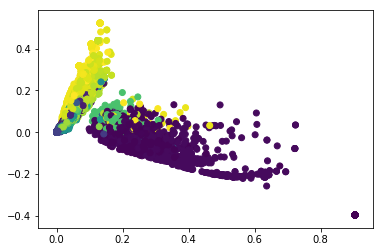

In [65]:
tc.plot_clusters(tfidf_matrx, df["cluster"])

In [66]:
tc.analyze(df, "cluster", n=3)

Number of clusters: 224


,lines count,top character,top series,most significant character
cluster,,,,
44,5445,"tyrion lannister ,jon snow ,daenerys targaryen","Season 2 ,Season 3 ,Season 4","man ,sam ,brienne"
7,401,"jon snow ,tyrion lannister ,daenerys targaryen","Season 3 ,Season 2 ,Season 6","ygritte ,brienne ,gilly"
215,352,"tyrion lannister ,jon snow ,cersei lannister","Season 2 ,Season 3 ,Season 6","walder ,petyr ,man"
3,318,"tyrion lannister ,cersei lannister ,jon snow","Season 2 ,Season 3 ,Season 5","petyr ,sam ,daario"
12,317,"tyrion lannister ,cersei lannister ,jaime lann...","Season 3 ,Season 5 ,Season 6","bronn ,varys ,sandor"
...,...,...,...,...
107,15,"nora ,cersei lannister ,shireen","Season 8 ,Season 3 ,Season 6","nora ,lommy ,balon"
128,14,"sam ,tyrion lannister ,locke","Season 3 ,Season 1 ,Season 4","ironborn ,crowd ,sam"
222,14,"jon snow ,davos ,tyrion lannister","Season 5 ,Season 2 ,Season 3","davos ,pycelle ,qyburn"


#### Depth 10, t=10

In [67]:
clusters = tc.get_clusters_from_linkage(linkage, depth=10, t=10)

In [68]:
df["cluster"] = pd.Series(clusters)

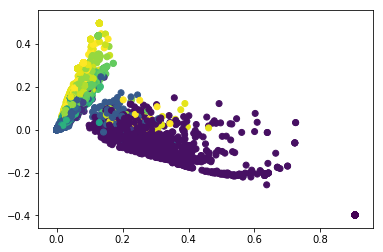

In [69]:
tc.plot_clusters(tfidf_matrx, df["cluster"])

In [73]:
tc.analyze(df, "cluster", n=3)

Number of clusters: 26


,lines count,top character,top series,most significant character,most significant season
cluster,,,,,
8,14682,"tyrion lannister ,jon snow ,daenerys targaryen","Season 2 ,Season 3 ,Season 4","sam ,davos ,man","Season 8 ,Season 7 ,Season 6"
2,949,"tyrion lannister ,jon snow ,cersei lannister","Season 2 ,Season 3 ,Season 4","sam ,petyr ,varys","Season 8 ,Season 7 ,Season 6"
22,859,"sansa stark ,varys ,melisandre","Season 1 ,Season 2 ,Season 3","melisandre ,varys ,petyr","Season 8 ,Season 7 ,Season 6"
20,624,"tyrion lannister ,daenerys targaryen ,cersei l...","Season 2 ,Season 3 ,Season 1","shae ,sandor ,petyr","Season 8 ,Season 7 ,Season 6"
6,535,"tyrion lannister ,cersei lannister ,jon snow","Season 2 ,Season 1 ,Season 4","davos ,petyr ,melisandre","Season 8 ,Season 7 ,Season 6"
24,533,"tyrion lannister ,jon snow ,cersei lannister","Season 2 ,Season 3 ,Season 6","man ,petyr ,davos","Season 8 ,Season 7 ,Season 6"
26,488,"davos ,qyburn ,jon snow","Season 2 ,Season 5 ,Season 4","barristan ,davos ,qyburn","Season 8 ,Season 7 ,Season 6"
19,459,"arya stark ,jon snow ,tyrion lannister","Season 6 ,Season 2 ,Season 4","man ,davos ,sandor","Season 8 ,Season 7 ,Season 6"
16,457,"tyrion lannister ,jaime lannister ,daenerys ta...","Season 3 ,Season 2 ,Season 4","bronn ,sam ,sandor","Season 8 ,Season 7 ,Season 6"


#### Max clusters = 50

In [78]:
clusters = tc.get_clusters_from_linkage(linkage, no_clusters=50)

In [79]:
df["cluster"] = pd.Series(clusters)

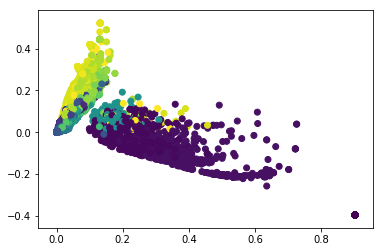

In [80]:
tc.plot_clusters(tfidf_matrx, df["cluster"])

In [81]:
tc.analyze(df, "cluster", n=3)

Number of clusters: 50


,lines count,top character,top series,most significant character,most significant season
cluster,,,,,
14,8842,"tyrion lannister ,jon snow ,daenerys targaryen","Season 2 ,Season 3 ,Season 4","sam ,man ,brienne","Season 8 ,Season 7 ,Season 6"
26,2868,"tyrion lannister ,jon snow ,daenerys targaryen","Season 2 ,Season 1 ,Season 3","petyr ,sam ,varys","Season 8 ,Season 7 ,Season 6"
44,859,"sansa stark ,varys ,melisandre","Season 1 ,Season 2 ,Season 3","melisandre ,varys ,pycelle","Season 8 ,Season 7 ,Season 6"
42,576,"tyrion lannister ,cersei lannister ,daenerys t...","Season 2 ,Season 3 ,Season 1","shae ,petyr ,bronn","Season 8 ,Season 7 ,Season 6"
2,548,"tyrion lannister ,cersei lannister ,jon snow","Season 2 ,Season 4 ,Season 5","petyr ,varys ,sam","Season 8 ,Season 7 ,Season 6"
7,535,"tyrion lannister ,cersei lannister ,jon snow","Season 2 ,Season 1 ,Season 4","davos ,petyr ,melisandre","Season 8 ,Season 7 ,Season 6"
46,533,"tyrion lannister ,jon snow ,cersei lannister","Season 2 ,Season 3 ,Season 6","man ,petyr ,davos","Season 8 ,Season 7 ,Season 6"
36,457,"tyrion lannister ,jaime lannister ,daenerys ta...","Season 3 ,Season 2 ,Season 4","bronn ,sam ,sandor","Season 8 ,Season 7 ,Season 6"
38,410,"tyrion lannister ,daenerys targaryen ,cersei l...","Season 4 ,Season 1 ,Season 2","sandor ,tormund ,bronn","Season 8 ,Season 7 ,Season 6"


#### Max clusters = 30

In [82]:
clusters = tc.get_clusters_from_linkage(linkage, no_clusters=30)

In [83]:
df["cluster"] = pd.Series(clusters)

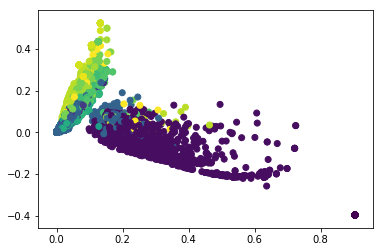

In [84]:
tc.plot_clusters(tfidf_matrx, df["cluster"])

In [85]:
tc.analyze(df, "cluster", n=3)

Number of clusters: 30


,lines count,top character,top series,most significant character,most significant season
cluster,,,,,
10,14316,"tyrion lannister ,jon snow ,daenerys targaryen","Season 2 ,Season 3 ,Season 4","sam ,davos ,bronn","Season 8 ,Season 7 ,Season 6"
2,949,"tyrion lannister ,jon snow ,cersei lannister","Season 2 ,Season 3 ,Season 4","sam ,petyr ,varys","Season 8 ,Season 7 ,Season 6"
24,859,"sansa stark ,varys ,melisandre","Season 1 ,Season 2 ,Season 3","melisandre ,varys ,petyr","Season 8 ,Season 7 ,Season 6"
22,624,"tyrion lannister ,daenerys targaryen ,cersei l...","Season 2 ,Season 3 ,Season 1","shae ,sandor ,bronn","Season 8 ,Season 7 ,Season 6"
6,535,"tyrion lannister ,cersei lannister ,jon snow","Season 2 ,Season 1 ,Season 4","davos ,petyr ,melisandre","Season 8 ,Season 7 ,Season 6"
26,533,"tyrion lannister ,jon snow ,cersei lannister","Season 2 ,Season 3 ,Season 6","man ,bronn ,petyr","Season 8 ,Season 7 ,Season 6"
21,459,"arya stark ,jon snow ,tyrion lannister","Season 6 ,Season 2 ,Season 4","man ,sandor ,davos","Season 8 ,Season 7 ,Season 6"
18,457,"tyrion lannister ,jaime lannister ,daenerys ta...","Season 3 ,Season 2 ,Season 4","bronn ,sam ,sandor","Season 8 ,Season 7 ,Season 6"
20,410,"tyrion lannister ,daenerys targaryen ,cersei l...","Season 4 ,Season 1 ,Season 2","sandor ,tormund ,bronn","Season 8 ,Season 7 ,Season 6"
